# Dự án 1: Phân tích dữ liệu + Xây dựng mô hình dự đoán lương

## Import các thư viện

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import warnings
import ipywidgets as widgets
from IPython.display import display
import math
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [93]:
# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)
df = pd.read_csv(path + '\\ai_job_dataset.csv')

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\bismasajjad\global-ai-job-market-and-salary-trends-2025\versions\1


## Xem qua dữ liệu

In [94]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### **Mô tả các cột trong bộ dữ liệu**

| Tên Cột (Column Name) | Mô tả Tiếng Việt (Vietnamese Description) | Kiểu dữ liệu (Data Type) |
| :--- | :--- | :--- |
| `job_id` | Mã định danh duy nhất cho mỗi tin tuyển dụng. | String |
| `job_title` | Chức danh công việc đã được chuẩn hóa. | String |
| `salary_usd` | Mức lương hàng năm tính bằng USD. | Integer |
| `salary_currency` | Đơn vị tiền tệ của mức lương gốc. | String |
| `salary_local` | Mức lương theo đơn vị tiền tệ địa phương. | Float |
| `experience_level` | Cấp độ kinh nghiệm: EN (Mới vào nghề), MI (Trung cấp), SE (Cao cấp), EX (Chuyên gia/Điều hành). | String |
| `employment_type` | Loại hình công việc: FT (Toàn thời gian), PT (Bán thời gian), CT (Hợp đồng), FL (Làm tự do). | String |
| `company_location` | Quốc gia nơi công ty đặt trụ sở. | String |
| `company_size` | Quy mô công ty: S (Nhỏ <50), M (Vừa 50-250), L (Lớn >250). | String |
| `employee_residence` | Quốc gia nơi nhân viên cư trú. | String |
| `remote_ratio` | Tỷ lệ làm việc từ xa: 0 (Không làm từ xa), 50 (Kết hợp/Hybrid), 100 (Làm từ xa hoàn toàn). | Integer |
| `required_skills` | 5 kỹ năng hàng đầu được yêu cầu (phân tách bằng dấu phẩy). | String |
| `education_required` | Yêu cầu học vấn tối thiểu. | String |
| `years_experience` | Số năm kinh nghiệm yêu cầu. | Integer |
| `industry` | Lĩnh vực/ngành nghề của công ty. | String |
| `posting_date` | Ngày đăng tin tuyển dụng. | Date |
| `application_deadline`| Hạn chót nộp hồ sơ. | Date |
| `job_description_length` | Độ dài của mô tả công việc (số lượng ký tự). | Integer |
| `benefits_score` | Điểm số đánh giá các gói phúc lợi (từ 1-10). | Float |

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

**Nhận xét**: Có vẻ như không tồn tại dòng nào thiếu và dữ liệu nhiều ở dạng string

In [96]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


**Một vài điều hay ho khi nhìn trung ở thị trường như sau**:  
1. Có tồn tại một vài TH đặc biệt có mức lương cao ~400k $ một năm, quy ra tiền việt là khoảng 10 tỷ một năm.
2. Bám sát vào mức lương trung vị (do cột salary tồn tại các ngoại lệ), ta thấy median rơi vào khoảng 150k $ một năm. So sánh với mức lương trung bình hàng năm tại Mỹ năm 2024 dao động khoảng 59.228 USD đến 63.171 USD thì ta thấy con số trên là khá ấn tượng, cho thấy sức nóng của các nghành nghề trên 
3. Trung bình các công ty thường tuyển dụng các vị trí có số năm kinh nghiệm rơi vào khoảng 5+ trở lên
3. Không có công ty nào là không có phúc lợi (benefit_score=0 vì min của cột này bằng 5). Cho thấy sự quan tâm của các doanh nghiệp đến người lao động. Trong một số trường hợp và vị trí, phúc lợi có thể lên đến max 10 (cao nhất)  

**Về mặt dữ liệu**: Không nhìn thấy các giá trị nào bất hợp lý trong range của các giá trị số

# Data Analyst Role

### Kiểm tra và làm sạch dữ liệu

1. Chuyển đổi kiểu dữ liệu của các cột ngày tháng năm

In [97]:
# Đổi kiểu dữ liệu datetime cho posting_date, application_date
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

2. Xóa trùng

In [98]:
df.drop_duplicates(inplace=True)

Tuy nhiên xóa trùng như này chưa đảm bảo lọc được trùng hoàn toàn. Theo tôi, ta cần xóa trùng dựa vào 1 vài thông tin như dưới

In [99]:
subset_col = ['company_name', 'job_title', 'company_location', 'employment_type', 'posting_date']
df.drop_duplicates(subset=subset_col, inplace=True)

3. Xem qua tập dữ liệu các cột

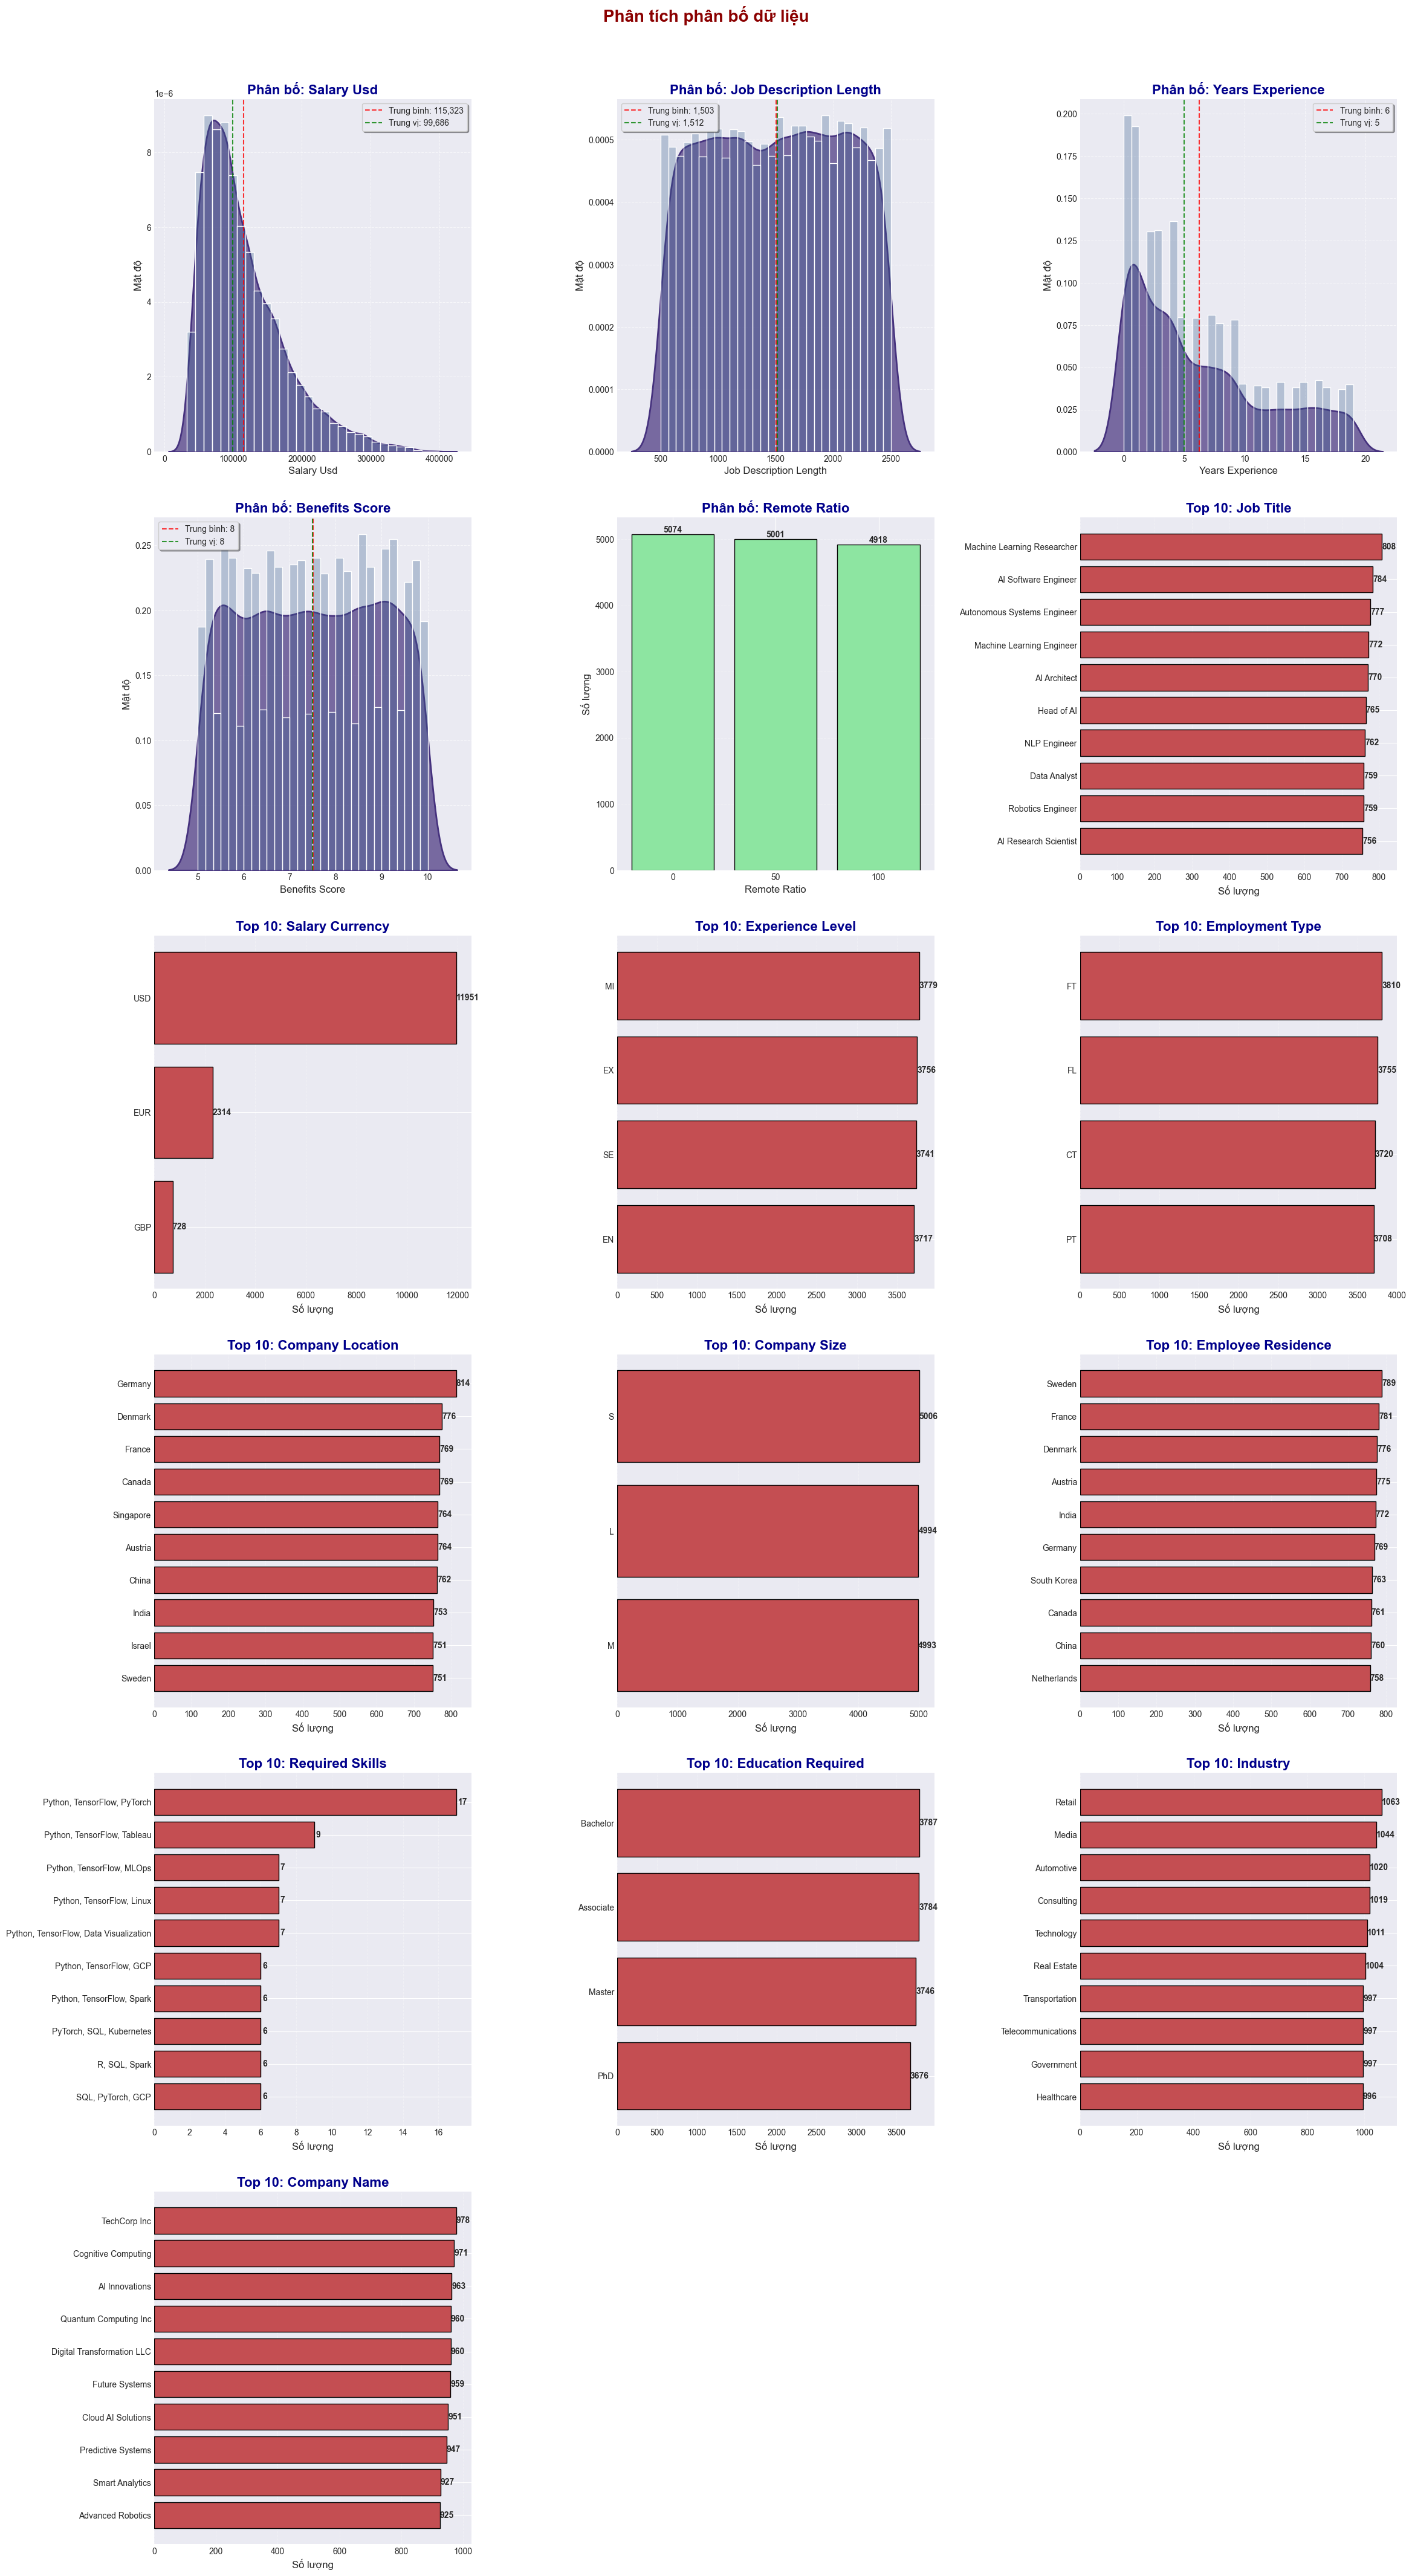

In [100]:
# Định nghĩa các cột
str_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'job_id']
continuous_columns = ['salary_usd', 'job_description_length', 'years_experience', 'benefits_score']
discrete_column = ['remote_ratio']

# Tổng số biểu đồ cần vẽ
total_plots = len(continuous_columns) + len(discrete_column) + len(str_columns)

# Tính số dòng cần thiết (3 cột mỗi dòng)
n_rows = math.ceil(total_plots / 3)

# Cải thiện: Sử dụng style của seaborn để có giao diện đẹp hơn
# Đảm bảo seaborn đã được import (ví dụ: import seaborn as sns)
# và matplotlib.pyplot đã được import (ví dụ: import matplotlib.pyplot as plt)
plt.style.use('seaborn-v0_8-darkgrid') # Hoặc 'ggplot', 'fivethirtyeight' để thử các phong cách khác

# Tạo figure với subplot
# Cải thiện: Tăng kích thước figure để biểu đồ rõ ràng hơn và có không gian hơn
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 7 * n_rows)) # Tăng chiều rộng và chiều cao
axes = axes.flatten()  # Chuyển thành mảng 1 chiều để dễ truy cập

# Đếm vị trí hiện tại
plot_idx = 0

# 1. Vẽ KDE plot cho các biến continuous
for col in continuous_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Cải thiện: Sử dụng sns.kdeplot và sns.histplot để tận dụng các tính năng của seaborn
        # Sử dụng màu sắc từ palette của seaborn để có sự nhất quán và hấp dẫn hơn
        sns.kdeplot(df[col], ax=ax, fill=True, color=sns.color_palette("viridis")[0], alpha=0.7, linewidth=2)
        
        # Thêm histogram mờ phía sau để thấy distribution rõ hơn
        sns.histplot(df[col], ax=ax, bins=30, alpha=0.3, color=sns.color_palette("viridis")[1], stat='density', kde=False)
        
        # Cải thiện: Tiêu đề rõ ràng hơn, font lớn hơn, màu sắc đậm hơn
        ax.set_title(f'Phân bố: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        # Cải thiện: Kích thước chữ cho nhãn trục
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Mật độ', fontsize=12)
        # Cải thiện: Kích thước chữ cho các giá trị trên trục
        ax.tick_params(axis='both', which='major', labelsize=10)
        # Cải thiện: Kiểu lưới rõ ràng hơn
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Thêm vertical line cho mean và median
        mean_val = df[col].mean()
        median_val = df[col].median()
        # Cải thiện: Alpha cao hơn cho đường trung bình/trung vị
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Trung bình: {mean_val:,.0f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Trung vị: {median_val:,.0f}')
        # Cải thiện: Legend đẹp hơn với khung và đổ bóng
        ax.legend(fontsize=10, frameon=True, shadow=True)
        
        plot_idx += 1

# 2. Vẽ bar plot cho biến discrete (remote_ratio)
for col in discrete_column:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Đếm tần suất của từng giá trị
        value_counts = df[col].value_counts().sort_index()
        
        # Cải thiện: Sử dụng màu sắc khác từ palette và thêm viền cho các cột
        bars = ax.bar(value_counts.index.astype(str), value_counts.values, color=sns.color_palette("pastel")[2], edgecolor='black')
        ax.set_title(f'Phân bố: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Số lượng', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        # Thêm giá trị trên mỗi cột
        for bar in bars:
            yval = bar.get_height()
            # Cải thiện: Vị trí và font của giá trị trên cột
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# 3. Vẽ horizontal bar plot cho các biến string
for col in str_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Lấy top 10 giá trị phổ biến nhất và sắp xếp tăng dần để dễ đọc
        top_values = df[col].value_counts().head(10).sort_values(ascending=True)
        
        # Vẽ horizontal bar plot
        y_pos = range(len(top_values))
        # Cải thiện: Màu sắc và viền cho các thanh
        bars = ax.barh(y_pos, top_values.values, color=sns.color_palette("deep")[3], edgecolor='black')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_values.index, fontsize=10)
        ax.set_title(f'Top 10: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel('Số lượng', fontsize=12)
        ax.tick_params(axis='x', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Thêm giá trị trên các thanh
        for bar in bars:
            xval = bar.get_width()
            # Cải thiện: Vị trí và font của giá trị trên thanh
            ax.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), va='center', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# Ẩn các subplot thừa
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

# Điều chỉnh layout
# Cải thiện: Thêm padding giữa các subplot
plt.tight_layout(pad=3.0)
# Cải thiện: Thêm tiêu đề chung cho toàn bộ figure
plt.suptitle('Phân tích phân bố dữ liệu', y=1.02, fontsize=20, fontweight='bold', color='darkred')
plt.show()


**Nhận xét về mặt dữ liệu**: 
- Dữ liệu có vẻ như không bị lỗi gì, tuy nhiên nếu ta chú ý vào cột required_skills thì ta nhân thấy rằng khi phản ảnh lên biểu đồ cột ngang thì có vẻ như nó chưa thể hiện đúng bản chất vấn đề. Ta cần tách chúng ra để dễ dàng phân tích 

**Nhận xét chung về mặt phân tích**:
- Đối với cột salary_usd, lương có xu hướng tập trung nhiều 70-90k USD/Năm. So với mặt bằng chung thì là cao.
- Đối với cột years_experience thì kinh nghiệm các công ty tuyển dụng nói chung thì đang tập trung tìm kiếm các ứng viên là thực tập sinh. Cơ bản mà nói thì các nghành về dữ liệu/trí tuệ nhân tạo cũng chỉ mới phát triển mạnh vào những năm gần đây
- Các biểu đồ khác khá đồng đều nhau, cho thấy nhu câu tuyển dụng phân bổ khá đồng đều. Tuy vậy, tôi tập trung vào biểu đồ Experience Level thì tôi nhận thấy rằng: mặc dù ở trên như ta thấy thì vị trí 0 year-exp chiếm nhiều nhất. Tuy vậy ở biểu đồ Experience Level thì MI (Level trung cấp) đang chiếm nhiều nhất, theo logic của tôi thì EN (Entry Level) lẽ ra phải nhiều nhất chứ. Có lẽ điều này tôi sẽ kiểm tra sau

### Công việc tiếp theo: tách bảng ban đầu thành 2 bảng: bảng chứa chỉ chứa job_id, required_skills (tuy nhiên dữ liệu đã được chuẩn) và bảng chứa tất cả các trường ngoại trừ required_skills 

In [101]:
# Tạo DataFrame mới chứa job_id và required_skills
skill_df = df[['job_id','required_skills']].copy() 
skill_df['required_skills'] = skill_df['required_skills'].str.split(',')
skill_df['required_skills'] = skill_df['required_skills'].apply(lambda x: [skill.title().strip() for skill in x])
skill_df = skill_df.explode(column='required_skills')
skill_df = pd.DataFrame(skill_df)
# Dataframe không chứa required_skills
new_df = df.drop(columns=['required_skills'])

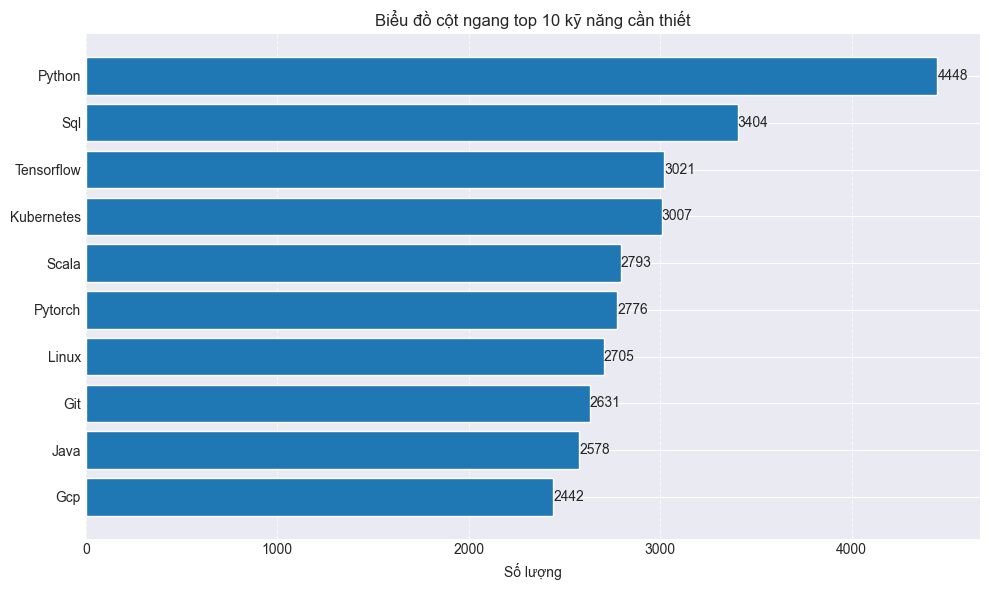

In [102]:

frequency = skill_df['required_skills'].value_counts().head(10)

# Chuẩn bị dữ liệu cho biểu đồ
categories = frequency.index.tolist() # Lấy các tên danh mục từ index của Series
values = frequency.values.tolist()    # Lấy các giá trị tần suất

# --- Phần vẽ biểu đồ cột ngang (tương tự như ví dụ trước) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột ngang
bars = ax.barh(np.arange(len(categories)), values)

# Đặt nhãn cho trục y (các cột chữ)
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Đảo ngược trục y để cột đầu tiên hiển thị ở trên cùng
ax.invert_yaxis()

# Thêm nhãn giá trị vào cuối mỗi cột
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width}',
            ha='left', va='center')

# Đặt tiêu đề và nhãn trục
ax.set_xlabel('Số lượng')
ax.set_title('Biểu đồ cột ngang top 10 kỹ năng cần thiết')

# Hiển thị lưới
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Insight**: Python vẫn luôn là kỹ năng quan trọng trong nghành khoa học dữ liệu nói chung và lập trình nói riêng. Bên cạnh đó, SQL cũng quan trọng không kém. Tensorflow cũng nổi trội tuy nhiên chỉ phù hợp với các vị trí như ML, AI, ...

## **Dashboard 1: Tổng quan toàn cảnh thị trường**

### **Dashboard dành cho**: các nhà quản lý, lãnh đạo
### **Câu hỏi**: các nhà quản lý, lãnh đạo quan tâm đến điều gì ?
#### 1. Phân Tích Cạnh Tranh về Lương Thưởng (Compensation & Competitive Analysis)

**Câu hỏi kinh doanh**:
+ Chúng ta đang trả lương có cạnh tranh không?
+ Chúng ta nên đặt ngân sách lương thưởng như thế nào cho các vị trí và thị trường khác nhau?

#### 2. Hoạch Định Kỹ Năng và Nguồn Lực (Skills & Workforce Planning)

**Câu hỏi kinh doanh**:
+ Chúng ta cần tập trung và đào tạo những kỹ năng nào cho nhân viên ?
+ Phúc lợi tương ứng đối với từng vị trí cho nhân viên ?

#### 3. Phân Tích Mô Hình Làm Việc và Địa Lý (Work Model & Geo Analysis)

**Câu hỏi kinh doanh**:
+ Mỏ vàng nhân tài đang nằm ở đâu ?
+ Có nên mở rộng mô hình làm việc của công ty ?

### **1. Phân tích cạnh tranh về lương thưởng**

#### Đầu tiên, tôi cần xác định xem cái vấn đề ở trên của tôi: có đúng là năm kinh nghiệm có mối quan hệ với experience level không

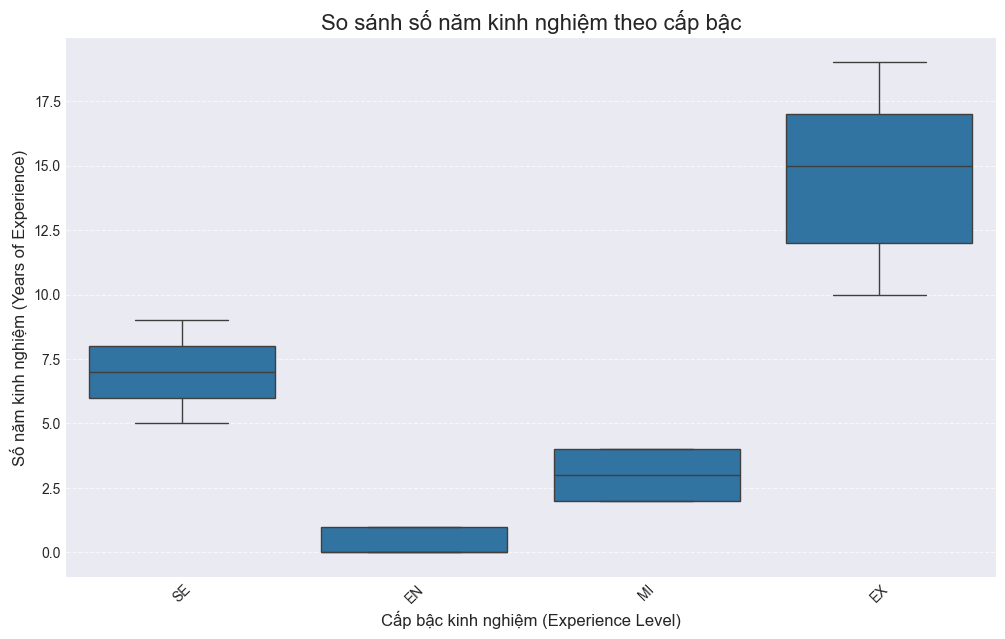

In [103]:

plt.figure(figsize=(12, 7))
# Thay bằng sns.violinplot
sns.boxplot(x='experience_level', y='years_experience', data=df)

plt.title('So sánh số năm kinh nghiệm theo cấp bậc', fontsize=16)
plt.xlabel('Cấp bậc kinh nghiệm (Experience Level)', fontsize=12)
plt.ylabel('Số năm kinh nghiệm (Years of Experience)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Như ta thấy ở đây**:
1. Mức độ entry (E): thường nằm ở mức kinh nghiệm là từ 0 đến 1 (hoặc 2)
2. Mức độ trung cấp (M): Có số năm kinh nghiệm khoảng từ 2.5 đến 4 (hoặc 5)
3. Mức độ cao cấp (SE): có só năm kinh nghiệm trong khoảng từ 6 đến 8 năm (có một số ngoại lệ nằm trong khoảng từ 5 đến 9)
4. Mức độ cao cấp (EX): có số năm kinh nghiệm rơi vào từ 10+

**Điều đó có ý nghĩa gì ?**
1. Việc xác định mối quan hệ giữa số năm kinh nghiệm và trình độ tương ứng có thể giúp cho doanh nghiệp xác định được mức độ phù hợp cho ứng viên. Từ đó có thể chọn được chính sách lương thưởng cho đúng đắn
2. Việc xác định rõ mối quan hệ này cũng giúp cho doanh nghiệp dễ dàng đánh giá người lao động và xếp hạng cho họ tương ứng. Đồng thời có những chính sách đãi ngộ cũng như là chính sách training phù hợp cho từng vị trí kinh nghiệm làm việc

#### Tiếp theo, tôi quan tâm đến số tiền lương trung bình cho từng vị trí là như thế nào ?

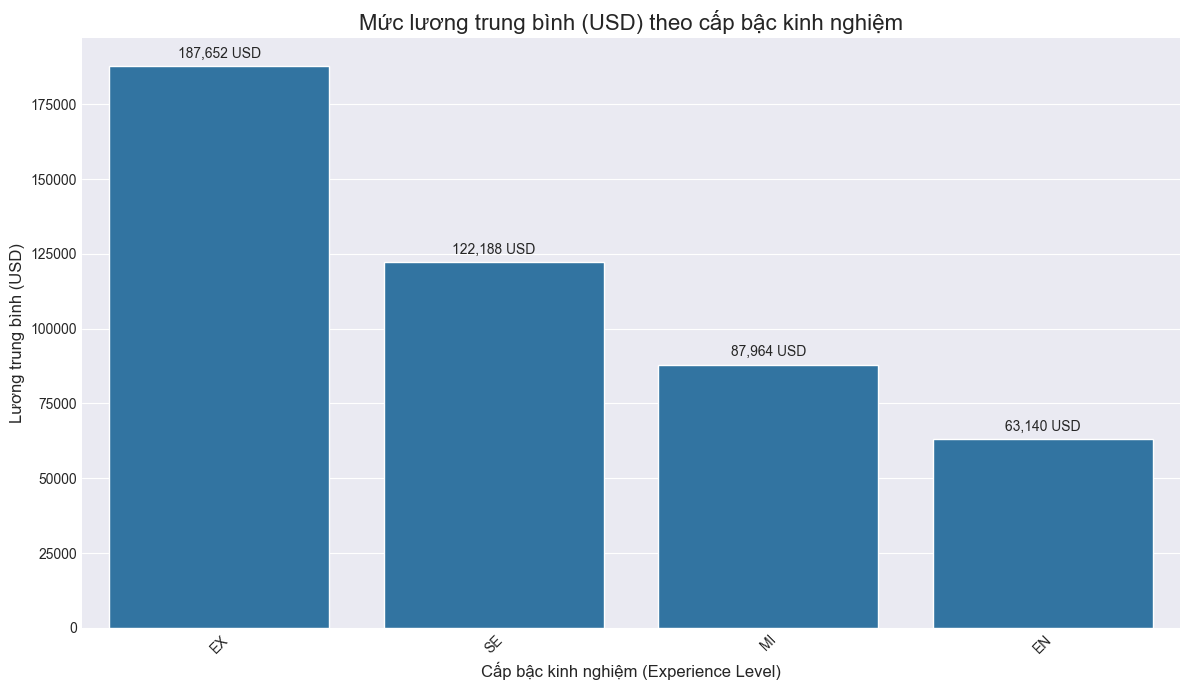

In [104]:
avg_salary_each_exp = df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=avg_salary_each_exp.index, y=avg_salary_each_exp.values)

# Thêm nhãn giá trị trên mỗi cột để dễ đọc
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f') + ' USD', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Đặt tiêu đề và nhãn
plt.title('Mức lương trung bình (USD) theo cấp bậc kinh nghiệm', fontsize=16)
plt.xlabel('Cấp bậc kinh nghiệm (Experience Level)', fontsize=12)
plt.ylabel('Lương trung bình (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # Tự động điều chỉnh cho vừa vặn
plt.show()

**Ta có nhận xét sau**:

Mức độ tăng trưởng lương rất cao qua các cấp bậc: từ vị trí EN đến EX, lương trung bình tăng gần 3x (từ $63K lên $188K). Để dễ hình dung, nếu kinh nghiệm của bạn tích lũy được thêm 9 năm, số tiền của bạn tương ứng tâng lên 3 lần. Tuy nhiên, cũng cần lưu ý rằng số năm kinh nghiệm không đảm bảo hoàn toàn rằng việc bạn có thể được tăng lương như vậy vì nó còn phụ thuộc nhiều vào các yếu tố khác nữa như: kỹ năng, hiệu suất, ...  

**Dựa vào biểu đồ trên, các nhà quản lý có thể"**
+ Cho nhân viên thấy được potential growth, tạo động lực cho nhân viên
+ Xác định được khoảng lương cụ thể cho từng vị trí
+ Dễ dàng tìm kiếm các ứng viên phù hợp dựa vào tình hình tài chính của công ty


#### Việc dựa vào vị trí để xác định mỗi lương thưởng nói chung là chưa đủ, có lẽ để hợp lý hơn. Ta cần chia theo cả loại hình công việc, quy mô công ty và theo quốc gia

**Công việc này sẽ được thực hiện ở trên power bi**

### **2. Hoạch Định Kỹ Năng và Nguồn Lực**

Như tôi đã phân tích tổng quan trước đó thì các kỹ năng được các nhà tuyển dụng tìm kiếm hàng nhiều nhất ở vị trí hiện tại đang là Python. Tiếp theo đó là SQL, Tensorflow, .... Bây giờ, ta cùng phân tích kỹ hơn chút

#### Giải quyết vấn đề 1: Ta cần tập trung những kỹ năng nào cho nhân viên ?

Đầu tiên ta cần phân rã từng nghành tương ứng (trong power bi ta sẽ dùng bộ lọc)

In [105]:
all_table =  new_df.merge(skill_df,left_on='job_id',right_on='job_id',how='inner')

In [ ]:

job_titles = sorted(all_table['job_title'].unique())

# --- BƯỚC 2: TẠO HÀM ĐỂ VẼ BIỂU ĐỒ CHO MỘT NGÀNH NGHỀ DUY NHẤT ---
# Hàm này sẽ được gọi mỗi khi bạn thay đổi lựa chọn trong dropdown
def plot_skills_for_job(job_title):
    # Lọc dữ liệu cho ngành nghề được chọn
    job_skills = all_table[all_table['job_title'] == job_title]
    
    # Đếm top 10 kỹ năng
    top_10_skills = job_skills['required_skills'].value_counts().nlargest(10)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 7))
    sns.barplot(x=top_10_skills.values, y=top_10_skills.index)
    
    # Tinh chỉnh biểu đồ
    plt.title(f'Top 10 Kỹ năng Quan trọng cho: {job_title}', fontsize=16)
    plt.xlabel('Số lượng yêu cầu', fontsize=12)
    plt.ylabel('Kỹ năng', fontsize=12)
    plt.tight_layout()
    plt.show()

# --- BƯỚC 3: TẠO VÀ HIỂN THỊ BỘ LỌC TƯƠNG TÁC ---
# widgets.interactive sẽ kết nối hàm plot_skills_for_job với dropdown
# Mỗi giá trị trong dropdown sẽ được truyền vào tham số 'job_title' của hàm
interactive_plot = widgets.interactive(
    plot_skills_for_job, 
    job_title=widgets.Dropdown(options=job_titles, description='Chọn Ngành:')
)

# Hiển thị bộ lọc và khu vực biểu đồ
display(interactive_plot)

interactive(children=(Dropdown(description='Chọn Ngành:', options=('AI Architect', 'AI Consultant', 'AI Produc…

Chưa dừng lại ở đó, ta sẽ tìm bộ kỹ năng "vàng": top 10 kỹ năng được trả lương cao nhất

In [107]:
skill_salary_analysis = all_table.groupby('required_skills')['salary_usd'].agg(['mean', 'median', 'count'])
skill_salary_analysis = skill_salary_analysis.sort_values(by='mean', ascending=False)

# Lọc ra những kỹ năng có 'count' lớn hơn hoặc bằng ngưỡng
significant_skills = skill_salary_analysis[skill_salary_analysis['count'] >= 5]

# Sắp xếp lại sau khi đã lọc
top_paying_skills = significant_skills.sort_values(by='mean', ascending=False)

# Làm cho bảng trông đẹp hơn
styled_table = top_paying_skills.head(10).style.format({
    'mean': '${:,.0f}',
    'median': '${:,.0f}'
}).set_caption('Top 10 Kỹ năng được trả lương cao nhất (USD)')

display(styled_table)


,mean,median,count
required_skills,,,
Deep Learning,"$117,242","$100,603",2189
Scala,"$117,140","$100,772",2793
Docker,"$116,739","$101,329",1861
Git,"$116,660","$103,182",2631
Nlp,"$116,242","$102,122",2144
Computer Vision,"$115,921","$99,577",2283
Gcp,"$115,800","$100,390",2442
Hadoop,"$115,750","$100,069",2419
Pytorch,"$115,554","$100,007",2776


**Dựa vào các biểu đồ trên, các nhà quản lý lãnh đạo có thể**:
- Lên phương án đào tạo cho nhân viên
- Nắm bắt được xu hướng của thị trường (phát triển theo hướng công nghệ/ tự động hóa/ ...)

#### Giải quyết vấn đề 2: Phúc lợi tương ứng đối với từng vị trí

In [108]:
def get_options_with_all(column_name):
    """Hàm helper để lấy các giá trị duy nhất và thêm 'Tất cả' vào đầu"""
    options = ['Tất cả'] + sorted(new_df[column_name].unique().tolist())
    return options

# Tạo các dropdown widget
industry_widget = widgets.Dropdown(options=get_options_with_all('industry'), description='Ngành:')
job_category_widget = widgets.Dropdown(options=get_options_with_all('job_title'), description='Loại CV:')
experience_level_widget = widgets.Dropdown(options=get_options_with_all('experience_level'), description='Cấp bậc:')


def display_benefit_score_card(industry, job_category, experience_level):
    
    # Lọc DataFrame dựa trên lựa chọn từ widgets
    filtered_df = new_df.copy()
    
    if industry != 'Tất cả':
        filtered_df = filtered_df[filtered_df['industry'] == industry]
        
    if job_category != 'Tất cả':
        filtered_df = filtered_df[filtered_df['job_title'] == job_category]
        
    if experience_level != 'Tất cả':
        filtered_df = filtered_df[filtered_df['experience_level'] == experience_level]
        
    # Tính toán điểm trung bình
    if not filtered_df.empty:
        avg_score = filtered_df['benefits_score'].mean()
        score_text = f"{avg_score:.2f}"
        num_jobs = len(filtered_df)
        footer_text = f"Dựa trên {num_jobs} tin tuyển dụng"
    else:
        score_text = "N/A" # Không có dữ liệu
        footer_text = "Không có dữ liệu phù hợp"
        
    # Vẽ card bằng matplotlib
    fig, ax = plt.subplots(figsize=(4, 2))
    fig.patch.set_facecolor('#f0f0f0') # Màu nền cho card
    
    # Hiển thị giá trị chính
    ax.text(0.5, 0.6, score_text, 
            ha='center', va='center', 
            fontsize=40, fontweight='bold', color='#007acc')
    
    # Hiển thị tiêu đề
    ax.text(0.5, 0.9, 'Điểm Phúc lợi Trung bình', 
            ha='center', va='center', 
            fontsize=14)

    # Hiển thị footer
    ax.text(0.5, 0.1, footer_text, 
            ha='center', va='center', 
            fontsize=10, color='grey')
            
    # Ẩn các trục
    ax.axis('off')
    plt.show()


# widgets.interactive sẽ theo dõi sự thay đổi của các widget
interactive_card = widgets.interactive(
    display_benefit_score_card,
    industry=industry_widget,
    job_category=job_category_widget,
    experience_level=experience_level_widget
)

# Hiển thị các bộ lọc và khu vực card
display(interactive_card)

interactive(children=(Dropdown(description='Ngành:', options=('Tất cả', 'Automotive', 'Consulting', 'Education…

**Dựa vào card trên, các nhà quản lý có thể:**
- Thay đổi các chính sách đãi ngộ của công ty để tìm kiếm các nhân tài: tăng lương thưởng, tổ chức nhiều hoạt động vui chơi hàng tháng/quý hơn,...
- Tạo thế cạnh tranh cho công ty trên thị trường lao động

### **3. Phân tích mô hình làm việc và địa lý**

#### Giải quyết vấn đề 1: Mỏ vàng nhân tài nằm ở đâu ?

1. Đếm số lượng tuyển dụng nhân viên trong nghành AI/Data theo employee_residence

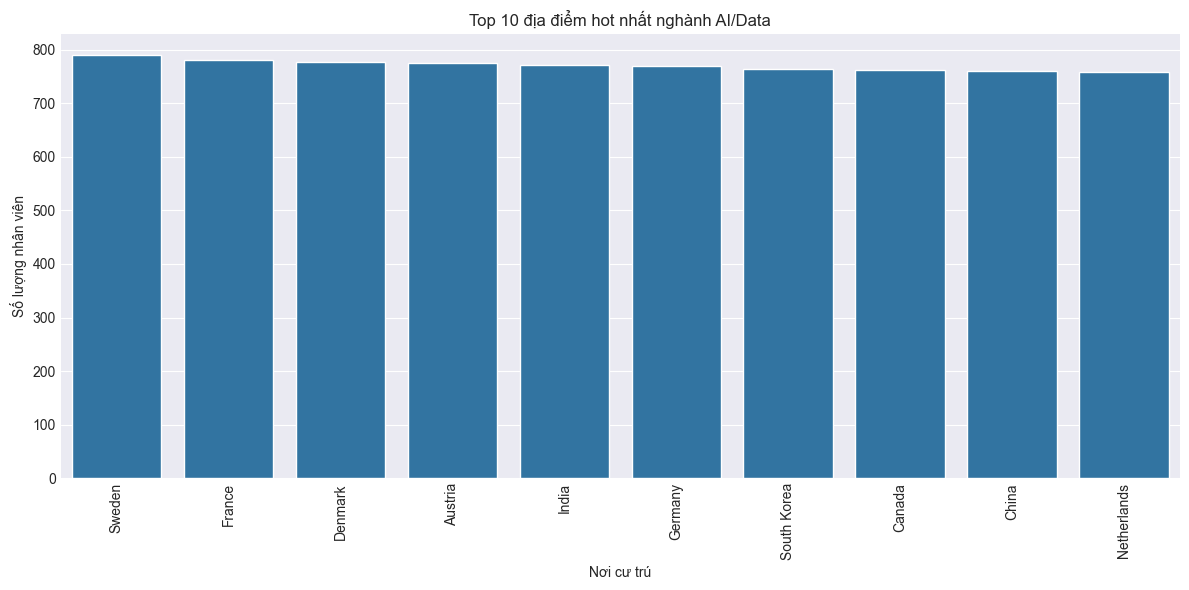

In [109]:
plt.figure(figsize=(12, 6)) # Tùy chỉnh kích thước biểu đồ cho dễ nhìn
sns.countplot(x='employee_residence', data=new_df, order=new_df['employee_residence'].value_counts().sort_values(ascending=False).index[:10])
plt.title('Top 10 địa điểm hot nhất nghành AI/Data')
plt.xlabel('Nơi cư trú')
plt.ylabel('Số lượng nhân viên')
plt.xticks(rotation=90) # Xoay nhãn trục x nếu có nhiều quốc gia
plt.tight_layout() # Điều chỉnh bố cục để tránh nhãn bị cắt
plt.show()

**Biểu đồ trên giúp các nhà quản lý**: Biết đâu là "điểm nóng AI", xem xét cơ hội cạnh tranh (nếu có)


2. Phân tích điểm nóng và chi phí tương ứng phải chi trả

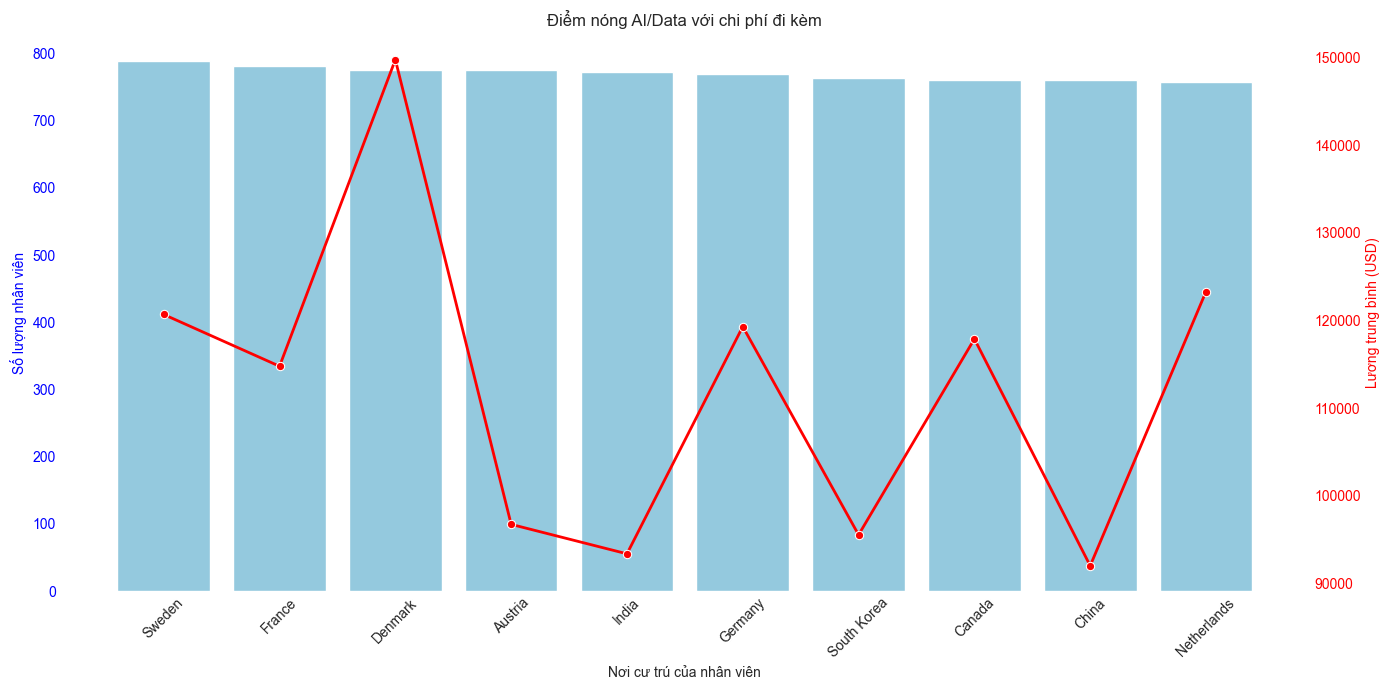

In [114]:

# Thiết lập kiểu biểu đồ Seaborn thành 'white' để loại bỏ nền và đường lưới
sns.set_style('white')

value_analysis = new_df.groupby('employee_residence')['salary_usd'].agg(['count', 'mean']).round(0)
# Lọc ra những nơi có ít nhất 5 nhân tài để kết quả đáng tin cậy
value_analysis_significant = value_analysis[value_analysis['count'] >= 5]
# Sắp xếp DataFrame để biểu đồ dễ đọc hơn (lấy top 10 theo count)
value_analysis_significant_sorted = value_analysis_significant.sort_values(by='count', ascending=False).head(10)

# Tạo figure và trục chính (ax1) cho biểu đồ cột
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ biểu đồ cột cho số lượng (count) với màu đơn giản
sns.barplot(x='employee_residence', y='count', data=value_analysis_significant_sorted, ax=ax1, color='skyblue')
ax1.set_xlabel('Nơi cư trú của nhân viên')
ax1.set_ylabel('Số lượng nhân viên', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Điểm nóng AI/Data với chi phí đi kèm')
ax1.tick_params(axis='x', rotation=45) # Xoay nhãn trục x để tránh chồng chéo

# Tạo trục y thứ hai (ax2) chia sẻ trục x với ax1
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho lương trung bình (mean)
sns.lineplot(x='employee_residence', y='mean', data=value_analysis_significant_sorted, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Lương trung bình (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.ticklabel_format(style='plain', axis='y') # Loại bỏ ký hiệu khoa học nếu có

# Điều chỉnh bố cục và hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Ở đây ta thấy**
- China là một trong những điểm nóng công nghệ trên thế giới. Mà hơn nữa, chi phí như ta thấy là thấp nhất -> Thế nên nhà lãnh đạo có thể tập trung vào thị trường này. Một lựa chọn khác là ở thị trường ấn độ

3. Các chuyên gia đầu nghành họ ở đâu ?

In [111]:
exp_filter = sorted(new_df['experience_level'].unique())

def my_plot(exp_input):
    # Đảm bảo exp_input là một list hoặc tuple, ngay cả khi chỉ chọn một giá trị
    # SelectMultiple luôn trả về một tuple, nhưng kiểm tra này an toàn hơn
    if not isinstance(exp_input, (list, tuple)):
        exp_input = [exp_input]

    # Lọc DataFrame dựa trên nhiều cấp độ kinh nghiệm được chọn
    # Sử dụng .isin() để kiểm tra xem giá trị có nằm trong list các lựa chọn không
    df_temp = new_df[new_df['experience_level'].isin(exp_input)].copy()

    plt.figure(figsize=(12, 6))

    if not df_temp.empty:
        # Lấy top 10 địa điểm hot nhất theo số lượng nhân viên
        # Sắp xếp lại theo số lượng giảm dần
        top_10_locations = df_temp['employee_residence'].value_counts().sort_values(ascending=False).index[:10]
        sns.countplot(x='employee_residence', data=df_temp, order=top_10_locations, color='skyblue')
        # Tiêu đề biểu đồ động, hiển thị các cấp độ kinh nghiệm đã chọn
        # Chuyển đổi tuple/list exp_input thành chuỗi để hiển thị
        title_exp = ', '.join(exp_input) if exp_input else 'Tất cả'
        plt.title(f'Top 10 địa điểm hot nhất ngành AI/Data cho cấp độ kinh nghiệm: {title_exp}')
        plt.xlabel('Nơi cư trú')
        plt.ylabel('Số lượng nhân viên')
        plt.xticks(rotation=90) # Xoay nhãn trục x để dễ đọc
        plt.tight_layout() # Điều chỉnh bố cục để tránh nhãn bị cắt
    else:
        # Hiển thị thông báo nếu không có dữ liệu cho các cấp độ kinh nghiệm này
        plt.text(0.5, 0.5, 'Không có dữ liệu cho các cấp độ kinh nghiệm này',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        title_exp = ', '.join(exp_input) if exp_input else 'Tất cả'
        plt.title(f'Không có dữ liệu cho cấp độ kinh nghiệm: {title_exp}')
        plt.axis('off') # Tắt trục nếu không có dữ liệu


# Tạo interactive widget với SelectMultiple để lựa chọn nhiều giá trị
interactive_plot = widgets.interactive(
    my_plot,
    exp_input = widgets.SelectMultiple(
        options=exp_filter,
        # Đặt giá trị mặc định. Chọn phần tử đầu tiên nếu exp_filter không rỗng.
        value=[exp_filter[0]] if exp_filter else [],
        description='Cấp độ kinh nghiệm:',
        disabled=False
    )
)

display(interactive_plot)


interactive(children=(SelectMultiple(description='Cấp độ kinh nghiệm:', index=(0,), options=('EN', 'EX', 'MI',…

**Công dụng biểu đồ**: Tìm kiếm được những thị trường giàu kinh nghiệm, kỹ năng và đáp ứng nhu cầu riêng của doanh nghiệp

#### Giải quyết vấn đề 2: Có nên mở rộng mô hình làm việc của công ty ?

Số lượng tuyển dụng với từng mô hình xét theo mô hình doanh nghiệp, nghành

In [112]:
sns.set_style("whitegrid")          

company_sizes = ['Tất cả'] + df['company_size'].unique().tolist()
industries    = ['Tất cả'] + df['industry'].unique().tolist()

def plot_remote_ratio_count(company_size, industry):
    d = df.copy()
    if company_size != 'Tất cả':
        d = d[d['company_size'] == company_size]
    if industry != 'Tất cả':
        d = d[d['industry'] == industry]

    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=d, x='remote_ratio',
                       order=[0, 50, 100],
                       color='steelblue')         

    ax.set_title('Phân bố mô hình làm việc', fontsize=14, pad=15)
    ax.set_xlabel('Tỷ lệ làm việc từ xa (%)')
    ax.set_ylabel('Số tin tuyển dụng')
    ax.set_xticklabels(['On-site', 'Hybrid', 'Remote'])

    for p in ax.patches:                           
        h = p.get_height()
        ax.annotate(f'{h}', (p.get_x()+p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

company_size_widget = widgets.Dropdown(options=company_sizes, value='Tất cả', description='Company size')
industry_widget     = widgets.Dropdown(options=industries,    value='Tất cả', description='Industry')

display(widgets.interactive(plot_remote_ratio_count,
                            company_size=company_size_widget,
                            industry=industry_widget))

interactive(children=(Dropdown(description='Company size', options=('Tất cả', 'M', 'L', 'S'), value='Tất cả'),…

Chi phí trung bình cho từng loại hình là như nào ?

In [113]:
# Lấy các giá trị duy nhất cho các bộ lọc
# Đảm bảo các giá trị này tồn tại trong new_df
industry_options = sorted(new_df['industry'].unique())
company_size_options = sorted(new_df['company_size'].unique())

def plot_remote_salary(industry_input):
    df_filtered = new_df.copy()

    # Xử lý bộ lọc industry
    # Kiểm tra nếu industry_input không rỗng và có ít nhất một lựa chọn
    if industry_input and len(industry_input) > 0:
        df_filtered = df_filtered[df_filtered['industry'].isin(industry_input)]

    plt.figure(figsize=(10, 6))

    if not df_filtered.empty:
        # Nhóm theo remote_ratio và tính mức lương trung bình
        remote_salary_analysis = df_filtered.groupby('remote_ratio')['salary_usd'].agg('mean').round(0).reset_index()
        # Chuyển đổi remote_ratio sang chuỗi và thêm '%' để hiển thị rõ ràng
        remote_salary_analysis['remote_ratio'] = remote_salary_analysis['remote_ratio'].astype(str) + '%'

        sns.barplot(x='remote_ratio', y='salary_usd', data=remote_salary_analysis, palette='viridis')
        plt.xlabel('Tỷ lệ làm việc từ xa')
        plt.ylabel('Lương trung bình (USD)')

        # Tạo tiêu đề động dựa trên các bộ lọc đã chọn
        title_parts = []
        if industry_input and len(industry_input) > 0:
            title_parts.append(f'Ngành: {', '.join(industry_input)}')
        if title_parts:
            plt.title(f'Lương trung bình theo tỷ lệ làm việc từ xa ({'; '.join(title_parts)})')
        else:
            plt.title('Lương trung bình theo tỷ lệ làm việc từ xa (Tất cả)')

        plt.ylim(bottom=0) # Đảm bảo trục y bắt đầu từ 0
        plt.tight_layout() # Điều chỉnh bố cục để tránh chồng chéo
    else:
        # Hiển thị thông báo nếu không có dữ liệu sau khi lọc
        plt.text(0.5, 0.5, 'Không có dữ liệu cho các lựa chọn này',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        plt.title('Không có dữ liệu')
        plt.axis('off') # Tắt trục nếu không có dữ liệu

    plt.show()

# Tạo các widget tương tác cho industry và company_size
industry_widget = widgets.SelectMultiple(
    options=industry_options,
    description='Ngành:',
    disabled=False
)

# Kết nối hàm vẽ biểu đồ với các widget
interactive_plot = widgets.interactive(
    plot_remote_salary,
    industry_input=industry_widget
)

# Hiển thị biểu đồ tương tác
display(interactive_plot)


interactive(children=(SelectMultiple(description='Ngành:', options=('Automotive', 'Consulting', 'Education', '…

**Dựa vào 2 biểu đồ trên**:
- Tùy theo từng hình thức doanh nghiệp là như nào thì dựa vào các biểu đồ được đưa ra, nhà lãnh đạo có thể đưa ra các quyết định. Giả định công ty hiện tại là công ty lĩnh vực công nghệ. Đối với lĩnh vực công nghệ thì việc làm việc từ xa là hoàn toàn khả thi có nhiều nền tảng online giúp cho các developer có thể tương tác, trao đổi với nhau và thực hiện công việc với nhau.
- Dựa vào biểu đồ đầu tiên, ta thấy được rằng số lượng tuyển dụng ở cả 3 vị trí trong nghành công nghệ là như nhau. Cho ta thấy được có vẻ xu hướng thị trường về nghành công nghệ về phong cách làm việc là khá tương đồng nhau. 
- Dựa vào biểu đồ thứ hia, ta thấy được là chi phí cho làm việc hoàn toàn remote có vẻ như là rẻ nhất. Sau đó đến on-site và đến hybrid. Ở đây, quản lý có thể dựa vào văn hóa làm việc của công ty,... để ra quyết định
- Tìm hiểu thêm về các công ty lớn trên thị trường thì ta thấy họ chuộng loại hình hybrid hơn cả. Nguyên nhân có thể là do tính chất công việc của nghành, chi phí các thứ và việc không ràng buộc on-site có thể giúp họ tiết kiệm tiền về mặt đi lại, ... cho nhân viên. Đồng thời cũng tạo môi trường thoải mái hơn cho nhân viên, giúp nhân viên tích cực cống hiến cho công ty hơn và tất nhiên cũng vẫn đảm bảo về mặt bảo mật được do nhân viên vẫn phải đến công ty

Tuy nhiên, nếu chỉ dừng lại ở trên là chưa đủ để ra 1 quyết định cụ thể gì. Ta tìm hiểu thêm:

1. Nâng suất của công ty có thay đổi không ? Có tạo ra các thay đổi tích cực không ?
2. Việc nếu quyết định thêm/thay đổi thì sẽ ra sao ? Các nhân viên làm theo phong cách hiện tại họ sẽ nghĩ gì ? 

### **Kết luận**
Và việc xây dựng dashboard này chủ yếu mang ý nghĩa: gợi ý, tham khảo cho các nhà quản lý mà thôi. Nếu được ra quyết định, chúng ta cũng cần tìm hiểu thêm nhiều vấn đề khác nữa như: phong cách, môi trường, văn hóa, ... của từng công ty cũng như là ở địa điểm ta làm việc thì mới có thể quyết định đúng đắn nhất

## **Dashboard 2: Tổng quan toàn cảnh thị trường**